<a href="https://colab.research.google.com/github/Ibrahim-Opeyemi/Investigating-a-Dataset-The-Movie-Database-movie-data/blob/main/Investigate_a_Dataset_The_Movie_Database_movie_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset: The Movie Database movie data
- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including ther release date, budget, revenue generated, users vote counts, etc. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#inspect">Performing operations to inspect data types and looking for instances of missing or possibly errant data</a></li>
        <li><a href="#observations">Observations</a></li>
        <li><a href="#cleaning">Data Cleaning: Fixing common issues found in the datasets</a></li>
        <ul>
            <li><a href="#missing">Missing data</a></li>
            <li><a href="#duplicate">Duplicate data</a></li>
            <li><a href="#incorrect">Incorrect data types</a></li>
        </ul>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#Research Q1">Research Question 1: What genres movies are most popular?</a></li>
        <li><a href="#Research Q2">Research Question 2: What genre of movies have usually been longest and shortest?</a></li>
        <li><a href="#Research Q3">Research Question 3: What are the top 10 movies by popularity?</a></li>
        <li><a href="#Research Q4">Research Question 4: Which year has the highest release of movies?</a></li>
        <li><a href="#Research Q5">Research Question 5: Do movies having higher budget more popular than movies with lower budget?</a></li>
        <li><a href="#Research Q6">Research Question 6: Which Month has the highest released number of movies in all of the years?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About Dataset
### Background
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

In this presentation, based on this dataset various questions will be answered for the curious minds. For example:
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?
- who are the most famous actors?
- Movie genres, how did they change all over the years.
- What about the revenues, budget and movie popularity, do they correlate with each other.

So Let's start exploring the dataset.

> **Importing required packages**

In [1]:
# Importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

In this step, I load in the data for inspection to understand the data structure, check for cleanliness, and then trim and clean the dataset for analysis. For this, I:
- check for missing data
- check for duplicate rows
- check and drop non-essential columns
- check for incorrect data types, etc.

In [3]:
# Loading data and printing out a few lines
df_movie = pd.read_csv('tmdb-movies.csv')

# Preview the dataset
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Table shown above is the first 5 rows from the TMDb dataset. Looking at each column, there are `id` columns as a unique value corresponding to each row - entry, which on its side represents each movie. There are other columns which describes financial values such budget and revenue. Other columns include information like the `genre` of each movie, the `production_companies`, the `released_date`, the `director` of each movie, the movies' `runtime`, the crowd's `vote_count`, etc.

In [4]:
# Checking the size and shape of the dataset
print('The Movie Database data shape :', df_movie.shape)

The Movie Database data shape : (10866, 21)


- Total rows are 10866
- Total columns are 21

<a id='inspect'></a>
> **Performing operations to inspect data types and looking for instances of missing or possibly errant data**

In [5]:
# Checking the datatypes of the columns

df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# This displays a concise summary of the dataframe, including the number of non-null values in each column
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# This returns useful descriptive statistics for each column of data
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the summary statistics, I can see:
- approximately 65 percent of the movies were popular

In [8]:
# Displaying the total number of null (missing) values in each column
df_movie.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Using the duplicated function to see which rows are duplicates
df_movie.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [10]:
# Displaying the count of the duplicates in the data set
sum(df_movie.duplicated())

1

In [11]:
# This returns the number of unique values in each column
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

<a id='observations'></a>
### Observations:
- #### For missing/null values:
> - `imdb_id` has **10** rows that are null
> - `cast` of **76** rows are missing
> - `homepage` has **7930** rows that are null
> - `director` has **44** rows that are null
> -  **2824** rows of movies have no `tagline`
> - `keywords` has **1493** rows that are null
> - **4** movies have no `overview`
> -  `genres` has **23** rows that are null
> - `production_companies` of **1030** rows are null

- #### For duplicate rows:
> - There is one duplicate row

- #### For incorrect data types:
> - release_date is in string format, so converting it to datetime format

<a id='cleaning'></a>

### Data Cleaning: Fixing common issues found in the datasets

<a id='missing'></a>
- ### Missing data

The columnn `imdb_id` do not contribute any analysis and so we can drop the column.

There are 7930 movies that don't have any `homepage`. We drop `homepage` column as it doesn't add any value to our analysis.

`Tagline`, `keywords`, and `overview` are very specific to individual movies and hence we drop those columns for our analysis.

In conclusion, we remove `imdb_id`, `homepage`, `tagline`, `overview`, and `keywords` columns

In [12]:
df_movie.drop(columns = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], inplace=True, axis=1)

In [13]:
df_movie

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


<a id='duplicate'></a>
- ### Duplicate data

In [14]:
# drop duplicate rows
df_movie.drop_duplicates(inplace=True)

In [15]:
sum(df_movie.duplicated())

0

<a id='incorrect'></a>
- ### Incorrect data types

In [16]:
type(df_movie.release_date[0])

str

In this case, release_date are represented as strings instead of datetime. So,

1.   List item
2.   List item

using the pandas function `to_datetime` to convert this column to datetime.

In [17]:
## Convert release_date from string format to datetime
df_movie['release_date'] = pd.to_datetime(df_movie['release_date'])
df_movie['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [18]:
type(df_movie.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
df_movie.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [20]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

Now we have completed the data wrangling step by dropping the not-required columns, making correction to incorrect data types and missing data, and removing duplicate rows/values.

In [21]:
# Saving the second dataframe with the movie database data into a csv file for the next section
df_movie.to_csv('tmdb-movies_edited.csv', index=False)

In [22]:
df_movies = pd.read_csv('tmdb-movies_edited.csv')
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis

<a id='Research Q1'></a>
> - ## Research Question 1: What genres are most popular?

In [23]:
# splitting by seperator

def splitbyseperator(column, seperator):
    return column.str.split(seperator, expand=True)

In [24]:
# creating a copy of genre
df_copy_genre = df_movies.copy()

In [25]:
# split the genre column and convert it to an array
## e.g. 'Action|Thriller|Horror' = ['Action','Thriller','Horror']

df_copy_genre['genres'] = df_copy_genre.genres.str.split('|')

In [26]:
# Now we use explode function to give each genre its individual row
df_genre_multiple = df_copy_genre.explode('genres')
df_genre_multiple.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [27]:
df_genre = df_genre_multiple[['popularity', 'genres','release_year']]
df_genre.head()

,popularity,genres,release_year
0,32.985763,Action,2015
0,32.985763,Adventure,2015
0,32.985763,Science Fiction,2015
0,32.985763,Thriller,2015
1,28.419936,Action,2015


In [28]:
df_genre

,popularity,genres,release_year
0,32.985763,Action,2015
0,32.985763,Adventure,2015
0,32.985763,Science Fiction,2015
0,32.985763,Thriller,2015
1,28.419936,Action,2015
...,...,...,...
10862,0.065141,Mystery,1966
10862,0.065141,Comedy,1966
10863,0.064317,Action,1966
10863,0.064317,Comedy,1966


In [29]:
# group by genre and get popularity

df_genre_grouped = df_genre_multiple.groupby(['release_year','genres']).popularity.mean()
genre_yearwise = df_genre_grouped.to_frame().groupby(level = 'release_year').popularity.nlargest(1).to_frame()

In [30]:
genre_yearwise.reset_index(level=2, inplace=True)

In [31]:
genre_yearwise.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1960) to (2015, 2015)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      56 non-null     object 
 1   popularity  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [32]:
genre = genre_yearwise.genres.value_counts()
genre

Adventure          14
Animation          10
Fantasy             8
Crime               5
War                 3
Family              3
Action              3
Music               2
Mystery             2
Science Fiction     2
Western             2
Thriller            1
History             1
Name: genres, dtype: int64

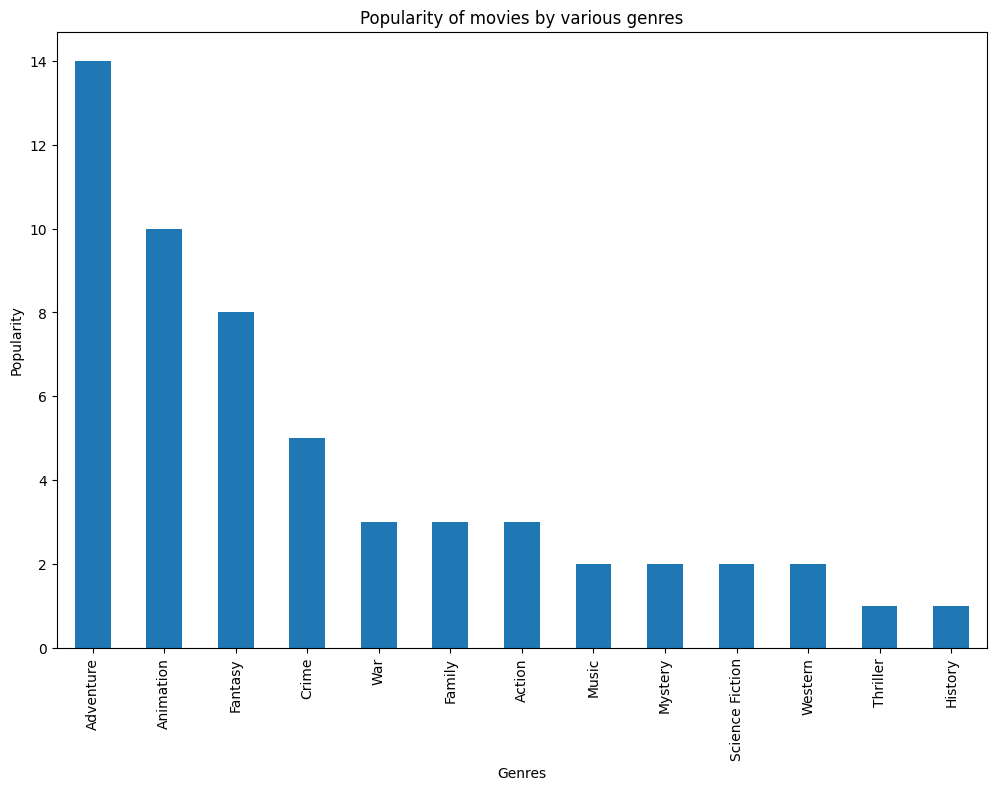

In [33]:
plt.figure(figsize = (12, 8));
genre.plot(title = "Popularity of movies by various genres", xlabel = 'Genres', ylabel = 'Popularity', kind='bar');

**Result:**
- Adventure kind of movies is the most popular genre category of movies followed by Animation and Fantasy category.

<a id='Research Q2'></a>
> - ## Research Question 2: What genre category of movies have usually been longest and shortest?

In [34]:
runtime_genre = df_genre_multiple.groupby('genres').runtime.mean().sort_values()

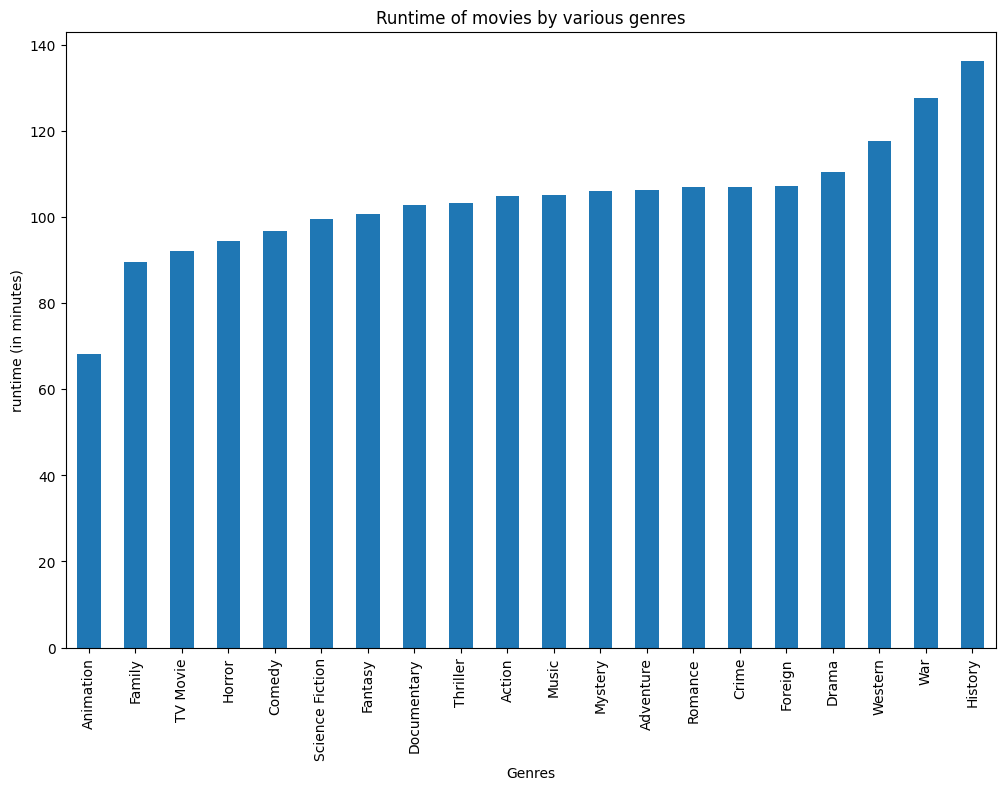

In [35]:
runtime_genre.plot(title = 'Runtime of movies by various genres', xlabel='Genres', ylabel='runtime (in minutes)', kind='bar', figsize=(12, 8));

**Results: By aggregate running time of various kind of genre movies we conclude that:**
- History movies are usually the longest (greater than 130 minutes but less than 140 minutes).
- War movies are the 2nd longest (approximately 130 minutes)
- Animation movies are usually the shortest (approximately 70 minutes)
- Family, TV Movie and Horror genre category of movies are usually the next shorter (increasing in minutes) set of movies respectively

<a id='Research Q3'></a>
> - ## Research Question 3: What are the top 10 movies by popularity?

In [36]:
top_movie_by_pop = df_movies.sort_values(by = ['popularity'], ascending = False)[['original_title', 'popularity']].head(10)
top_movie_by_pop.reset_index(drop=True, inplace=True)
top_movie_by_pop.set_index('original_title', inplace=True)
top_movie_by_pop

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
Captain America: The Winter Soldier,12.971027
Star Wars,12.037933
John Wick,11.422751
Star Wars: The Force Awakens,11.173104


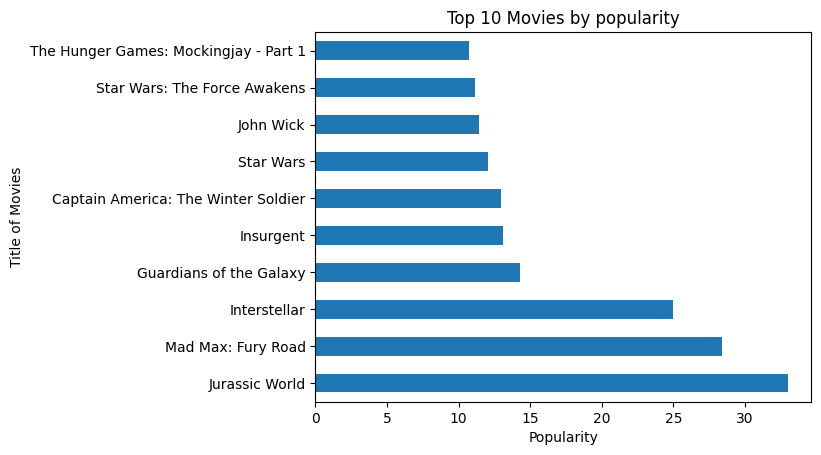

In [37]:
top_movie_by_pop.popularity.plot(kind='barh')
plt.title('Top 10 Movies by popularity')
plt.ylabel('Title of Movies')
plt.xlabel('Popularity');

In [38]:
top_movie_by_pop = df_movies[['original_title', 'popularity']]

sns.set(rc={'figure.figsize':(12, 8)}, font_scale = 1)

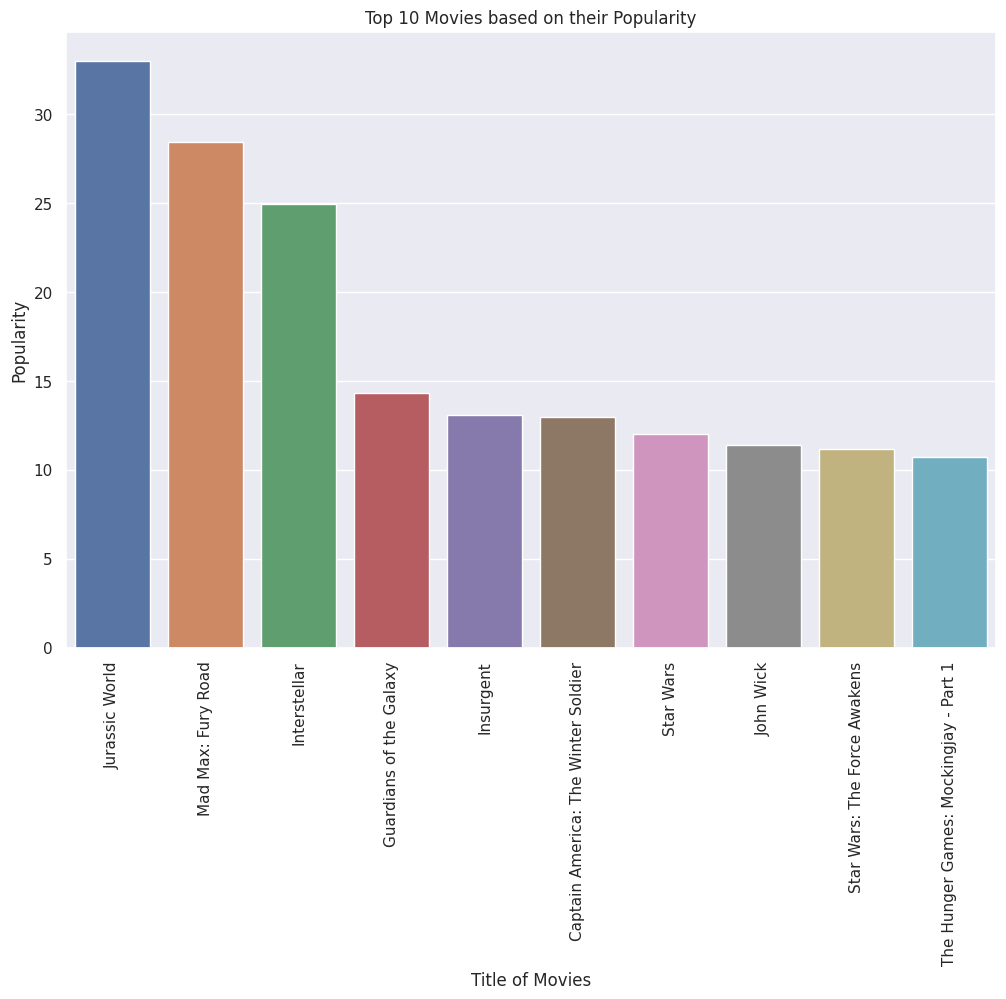

In [45]:
ax = sns.barplot(x = top_movie_by_pop.sort_values(by="popularity", ascending=False).head(10).original_title,
                 y = top_movie_by_pop.sort_values(by="popularity", ascending=False).head(10).popularity)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(90)

ax.set(xlabel='Title of Movies', ylabel='Popularity', title = 'Top 10 Movies based on their Popularity')
plt.show();

**Result/Observation:**
- Jurassic World, Mad Max: Fury Road and Interstellar are the Top 3 movies based on popularity.

<a id='Research Q4'></a>
> - ## Research Question 4: Which year has the highest release of movies?

In [46]:
# counting the number of movies in each year

df_movies_count = df_movies.groupby('release_year').count()['id']

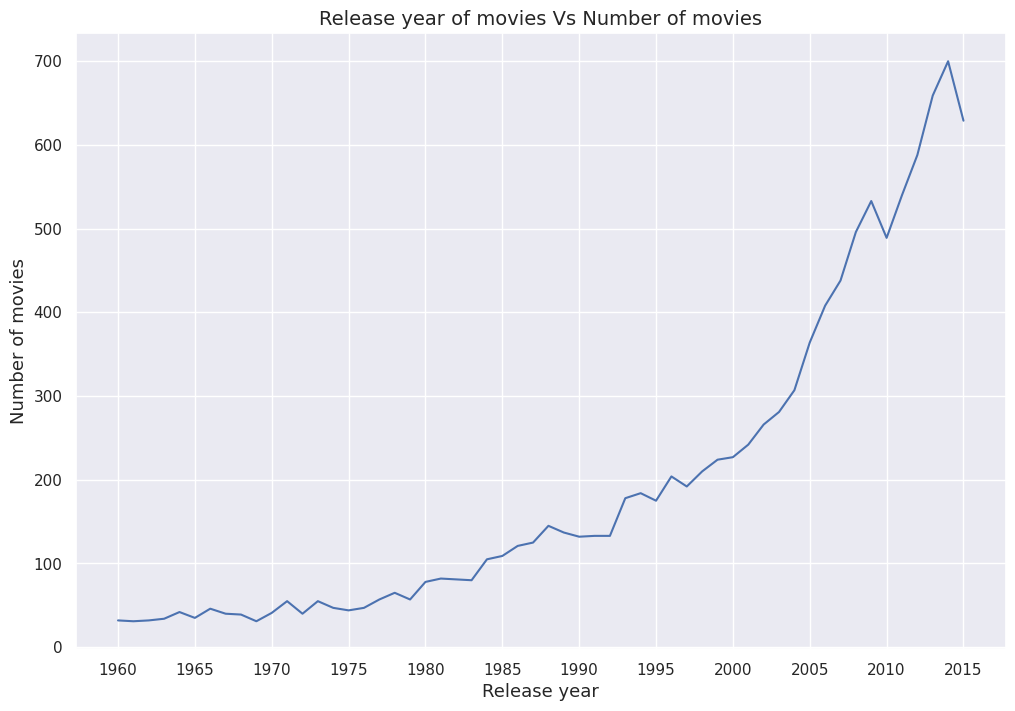

In [47]:
df_movies_count.plot(xticks = np.arange(1960, 2016, 5))
sns.set(rc = {'figure.figsize': (12, 8)})
plt.title("Release year of movies Vs Number of movies", fontsize = 14)
plt.xlabel('Release year', fontsize = 13)
plt.ylabel('Number of movies', fontsize = 13)

# style sheet
sns.set_style("whitegrid")

After seeing the plot and the output, I conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

<a id='Research Q5'></a>
> - ### Research Question 5: Do movies having higher budget more popular than movies with lower budget?

In [48]:
##source of quantilecut code https://medium.com/@onpillow/02-investigate-tmdb-movie-dataset-python-data-analysis-project-part-2-exploratory-data-4839f697092
def cut_into_quantile(dfname, column_name):
    """
        cut_into_quantile takes data frame and column name as param.
        returns the dataframe with an additional column "columnname_levels" and divide it into 4 quantiles.
    """
    ## find quartile,max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()

    ## bin edges that will be used to cut data in groups
    bin_edges = [min_value,first_quantile,second_quantile,third_quantile,max_value]

    ## labels for the four budget level groups
    bin_names = ['Low','Medium','Moderately High','High']

    ## Create budget levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name],bin_edges,labels=bin_names,include_lowest=True)
    return dfname

In [49]:
df_movies_c = df_movies[df_movies['budget_adj']!=0].copy()
df_budget_group = cut_into_quantile(df_movies_c, 'budget_adj')

In [50]:
df_budget_filtered_data = df_budget_group[df_budget_group['release_year'].isin([2010, 2011, 2012, 2013, 2014, 2015])]

df_popularity_on_budget = df_budget_filtered_data.groupby(['release_year','budget_adj_levels']).popularity.mean().to_frame().reset_index()

In [51]:
short_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Low'].popularity.tolist()
medium_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Medium'].popularity.tolist()
mod_long_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Moderately High'].popularity.tolist()
long_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'High'].popularity.tolist()

In [54]:
len(df_popularity_on_budget)

24

In [ ]:
len(high_revenue_pop)

In [56]:
release_years = [2010,2011,2012,2013,2014,2015]

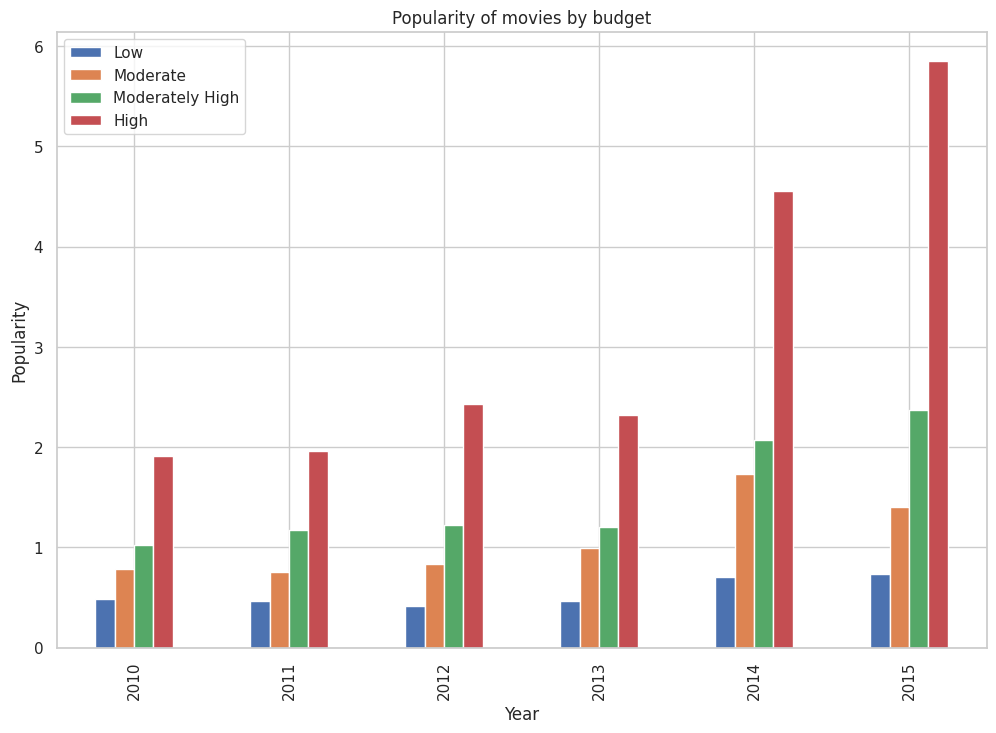

In [57]:
plotdata = pd.DataFrame({
    "Low": short_movie_vote,
    "Moderate": medium_movie_vote,
    "Moderately High": mod_long_movie_vote,
    "High": long_movie_vote
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies by budget')
plt.xlabel("Year")
plt.ylabel("Popularity");

### Results - Budget and Popularity

* Seeing the latest trends in above graph we could say Higher budget movies are more popular.
* Higher budget movies have higher marketing expense as compared to the lower budget movies

<a id='Research Q6'></a>
> - ## Research Question 6: Which Month has the highest released number of movies in all of the years?

In [58]:
number_of_release = df_movies['release_date'].dt.month.value_counts().sort_index()

In [60]:
number_of_release

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64

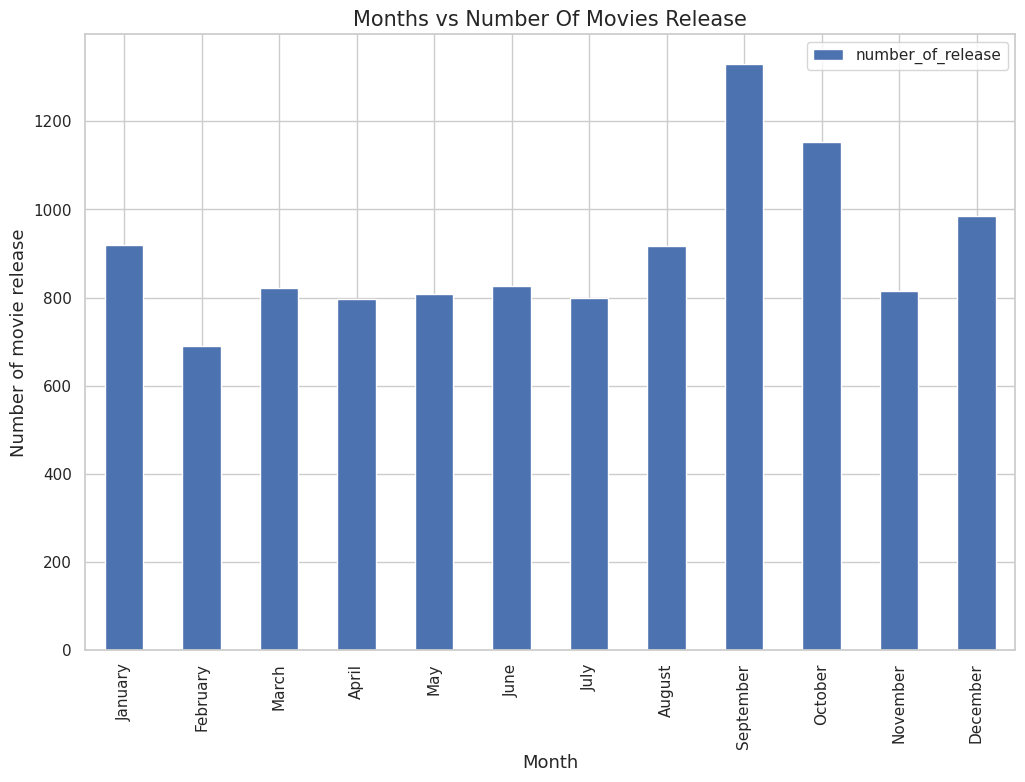

In [61]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

# change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date': 'number_of_release'}, inplace=True)

number_of_release.plot(x = 'month', kind = 'bar', fontsize = 11, figsize = (12, 8));

# set the labels and titles of the plot.
plt.title('Months vs Number Of Movies Release', fontsize = 15);
plt.xlabel('Month', fontsize = 13);
plt.ylabel('Number of movie release', fontsize = 13);

### Result:
According to the plot of `Number of movie release` against `Month`, I conclude that **September** has the highest released number of movies in all of the years with `1331` movies released, followed by **October** with `1153` movies released.

<a id='conclusions'></a>
## Conclusions

Based on the data set analysis we tried to answer a total of 12 questions. Out of which 6 were quantitative and 6 were qualitative. We classified the movies in low budget, moderate budget, high budget and very high budget movies. Based on the latest 5 years 2010 to 2015, we tried to answer Do high budget movies had high popularity? Based on the data we found it looks that high budget movies tend to be more popular. We also classified movies based on short, medium and moderate and very long movies based on their runtime, we found that very long movies are more popular than long movies. Also long > medium > short in terms of popularity. If we go by average votes very long movies again tops the list while medium length movies were found to be least popular among all the five years from 2010 to 2015.In this analysis, we also answered what genres were most popular? The answer for this question came out to be Adventure (25%) followed by Animation and Fantasy. Also we tried to identify what genre of movies have been the longest. The analysis shows that History and war movies to be the longest whereas animation movies usually had the least running time. Also if you are planning for a movie weekend and wish to enjoy the top rated movies in period 1960-2015, "The Story of Film: An Odyssey" and "The Mask You Live In" must be included in your list as they are the top 2 popular movies. We then also dived and tried to identify what genre movies are more popular? We found Adventure movies had highest average popularity followed by Animation whereas History movies tends to have least popularity.

Based on our analysis we also found that September month is when most number of movies were released in this period.

**Summary Conclusion**
Higher budget movies usually had more popularity as compared to lower budget movies.
Movie nakers referred September and October month for releasing their movie followed by December and January
Colin Trevorrow is the director whose movies have the max popularity.
Mark Cousins is the director whose movies have the max average voter ratings.
Jurassic World was the most popular movie.
The Story of Film An Odyssey has got the highest average rang of 9.2.
Higher budget movies were found to be more popular than their lower counterparts.
Robert D Niro has acted in most movies (72) from 1960 to 2015.
From 1960 to 2015 adventure movies were most prominent and constituted the largest proportion of all movie genres from 1960 to 2015 (25%).
Very Long movies are found to be more popular and have higher vote_avg ratings than their shorter counterparts.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!